## The Spark Foundation GRIP Jan-2021 
## TASK 1
## Prediction Using Supervised Machine Learning

In [1]:
# Importing all the libraries required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the Data from given url
url = 'http://bit.ly/w-data'
student_data = pd.read_csv(url)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking shape of the student_data
student_data.shape

(25, 2)

In [4]:
# Getting information from student_data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

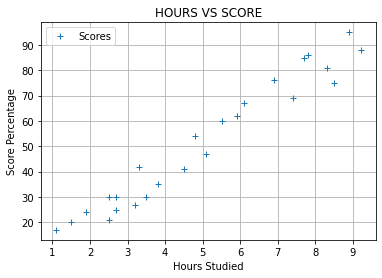

In [6]:
#Plotting the distribution of scores
student_data.plot(x='Hours',y='Scores',style='+')
plt.title('HOURS VS SCORE')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.grid()
plt.show()

### Preparing the Data

In [7]:
# Divide the data into two parts  X- is inputs y- is output
X =  student_data.iloc[:, :-1].values
Y =  student_data.iloc[:, 1].values

In [8]:
# split this data into training and test sets with the help of Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [9]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print('Training Complete')

Training Complete


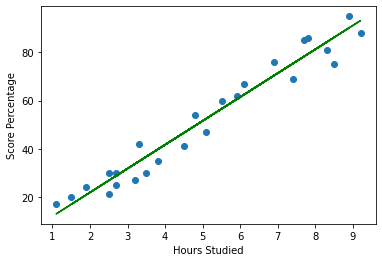

In [10]:
#Plotting the regression line
line = model.coef_*X + model.intercept_
#Plotting the test data
plt.scatter(X, Y)
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.plot(X, line, color='g')
plt.show()

In [11]:
# making predictions
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [12]:
#Comparing Actual v Predicted
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# Predicted score if a student studies for 9.25 hrs/ day
future_value = model.predict([[9.25]])
print(f' predicted score is : {future_value[0]}')

 predicted score is : 93.69173248737538


In [14]:
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error:  4.183859899002975


# Thank you...